# XRD

## .xyファイルを.csvファイルに変換

In [3]:
import re
import csv

#.xyファイルを最適化、.csvファイルに変換
def data_read(path, mode, filename, contents):
    with open(path, mode) as f1:
        with open(filename, 'a', newline="") as f2:
            t = 0
            row = f1.readline()
            writer = csv.writer(f2)
            while row:
                if contents:
                    print("---- Row data ----")
                    print("Type of ""data"":{}".format(type(row)))
                    print(row)
                if t > 0:
                    s = re.split(' |\n', row)
                    if contents:
                        print(s)
                    writer.writerow([s[0], s[1]])
                t = t + 1
                row = f1.readline()

#ファイル名の設定
def data_create(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    filename = 'XRD_Data_Edited/'+name[len(name)-1]+'.csv'
    with open(filename, 'w') as f:
        f.write('')
        print(name[len(name)-1] + ' was created!')
        print(filename)
    return filename

#本文
if __name__=="__main__":
    path = 'Data/filename'
    mode = "r"
    filename = data_create(path)
    data_read(path, mode, filename, False)
    

20201202 Ni-Ba122 for SUS PICT before heating_exported_2 was created!
XRD_Data_Edited/20201202 Ni-Ba122 for SUS PICT before heating_exported_2.csv


### 仮グラフの可視化

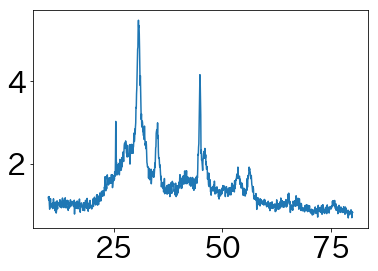

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 30
#任意のファイル
df = pd.read_csv('XRD_Data_Edited/filename.csv', header=None, names=['2theta (degree)', 'Intensity'])
plt.plot(df['2theta (degree)'], df['Intensity'])

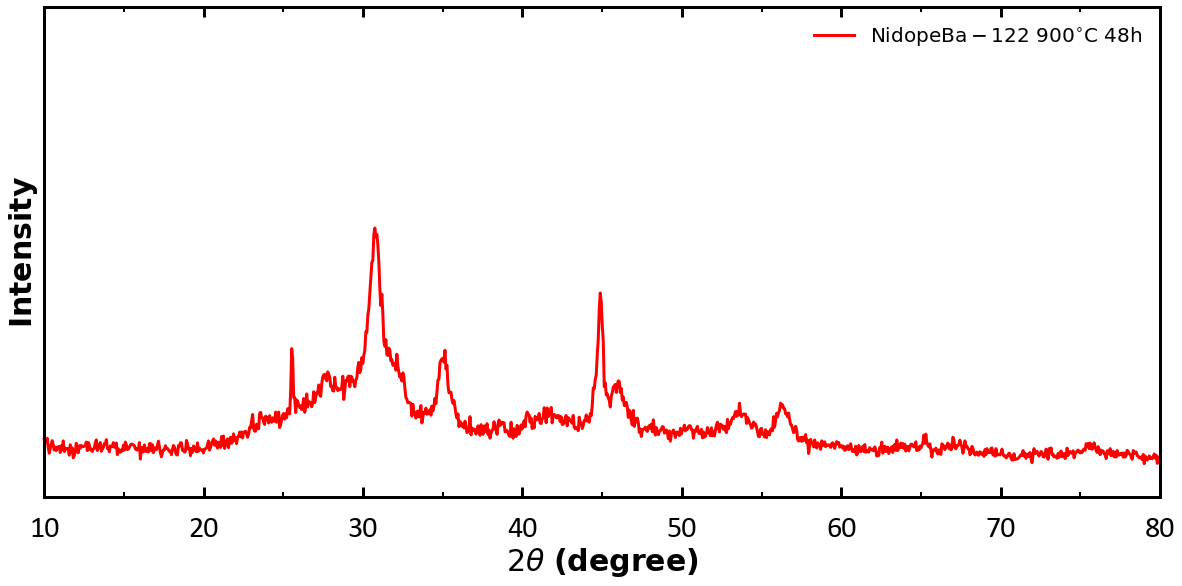

In [6]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')

plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 30

def data_name(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    return 'XRD_Result/'+name[len(name)-1]+'.png'



path = 'filename'

fig = plt.figure(figsize = (20, 10))
fig.patch.set_edgecolor('k')

fig.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(10, 80)
ax1.set_xticks(np.arange(10, 80+1, 10))
ax1.set_xticklabels(np.arange(10, 80+1, 10), fontproperties = f_Calibri, fontsize = 30)
ax1.set_xlabel(xlabel = '$2\\theta\ \mathbf{(degree)}$', fontproperties = f_Calibri, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

#y軸の目盛りの設定
ax1.set_ylim(0, 0.01)
ax1.set_yticks([])
ax1.set_yticklabels([], fontproperties = f_Calibri, fontsize = 30)
ax1.set_ylabel(ylabel = '$\mathbf{Intensity}$', fontsize = 30)

#y軸の補助目盛りの設定
#ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0))

#プロット
ax1.plot(df['2theta (degree)'], df['Intensity']/1000 ,color = 'red', marker = '.', markersize = '0', linewidth = 3, clip_on = False)

#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(['$\mathrm{NidopeBa-122\ 900^{\circ}C\ 48h}$'], prop={'size':20,'fname':r'C:\WINDOWS\Fonts\Calibri.ttf'}, frameon = False,)

plt.show()

figname = data_name(path)

#fig.savefig(figname, format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

In [9]:
import pandas as pd
df1 = pd.read_csv('XRD_Data_Edited/20201211 freshersinn Nidope Ba122 700 48h yarinaoshi no bg_exported.csv', header=None, names=['2theta (degree)', 'Intensity'])
df2 = pd.read_csv('XRD_Data_Edited/20201216 freshersinn Ni dope Ba122 SUS PICT 900 48h no bg_exported.csv', header=None, names=['2theta (degree)', 'Intensity'])
df3 = pd.read_csv('XRD_Data_Edited/BaFe2As2.csv', header=None, names=['2theta (degree)', 'Intensity'])
df4 = pd.read_csv('XRD_Data_Edited/FeAs.csv', header=None, names=['2theta (degree)', 'Intensity'])
df5 = pd.read_csv('XRD_Data_Edited/20201202 Ni-Ba122 for SUS PICT before heating_exported.csv', header=None, names=['2theta (degree)', 'Intensity'])

df_sumi = pd.DataFrame()
df_sumi = df3[(df3['2theta (degree)'] < 80) & (df3['2theta (degree)'] > 9)].copy()
df_sumi1 = pd.DataFrame()
df_sumi1 = df4[(df4['2theta (degree)'] < 80) & (df4['2theta (degree)'] > 10)].copy()

In [39]:
df1['Intensity'] = df1['Intensity']/df1['Intensity'].max()
df2['Intensity'] = df2['Intensity']/df2['Intensity'].max()
df_sumi['Intensity'] = df_sumi['Intensity']/df_sumi['Intensity'].max()
df_sumi1['Intensity'] = df_sumi1['Intensity']/df_sumi1['Intensity'].max()
df5['Intensity'] = df5['Intensity']/df5['Intensity'].max()

#df1.to_csv('XRD_Result/700 48h Normalized XRD NidopeBa122.csv', header=True, index=False)
#df2.to_csv('XRD_Result/900 48h Normalized XRD NidopeBa122.csv', header=True, index=False)
#df_sumi.to_csv('XRD_Result/Normalized BaFe2As2.csv', header=True, index=False)
#df_sumi1.to_csv('XRD_Result/Normalized FeAs.csv', header=True, index=False)


      2theta (degree)  Intensity
1518        50.004393   0.004604
1519        50.030746   0.004301
1520        50.057098   0.002227
1521        50.083450   0.006401
1522        50.109802   0.008246
1523        50.136155   0.017644
1524        50.162507   0.022382
1525        50.188859   0.034300
1526        50.215211   0.046871
1527        50.241564   0.041917
1528        50.267916   0.025217
1529        50.294268   0.015231
1530        50.320620   0.013824
1531        50.346973   0.008036
1532        50.373325   0.006165
1533        50.399677   0.005508
1534        50.426029   0.001402
1535        50.452382   0.004663
1536        50.478734   0.002239
1537        50.505086   0.002612
1538        50.531439   0.001309
1539        50.557791   0.004109
1540        50.584143   0.003555
1541        50.610495   0.004680
1542        50.636848   0.002170
1543        50.663200   0.005722
1544        50.689552   0.006664
1545        50.715904   0.006303
1546        50.742257   0.003892
1547      

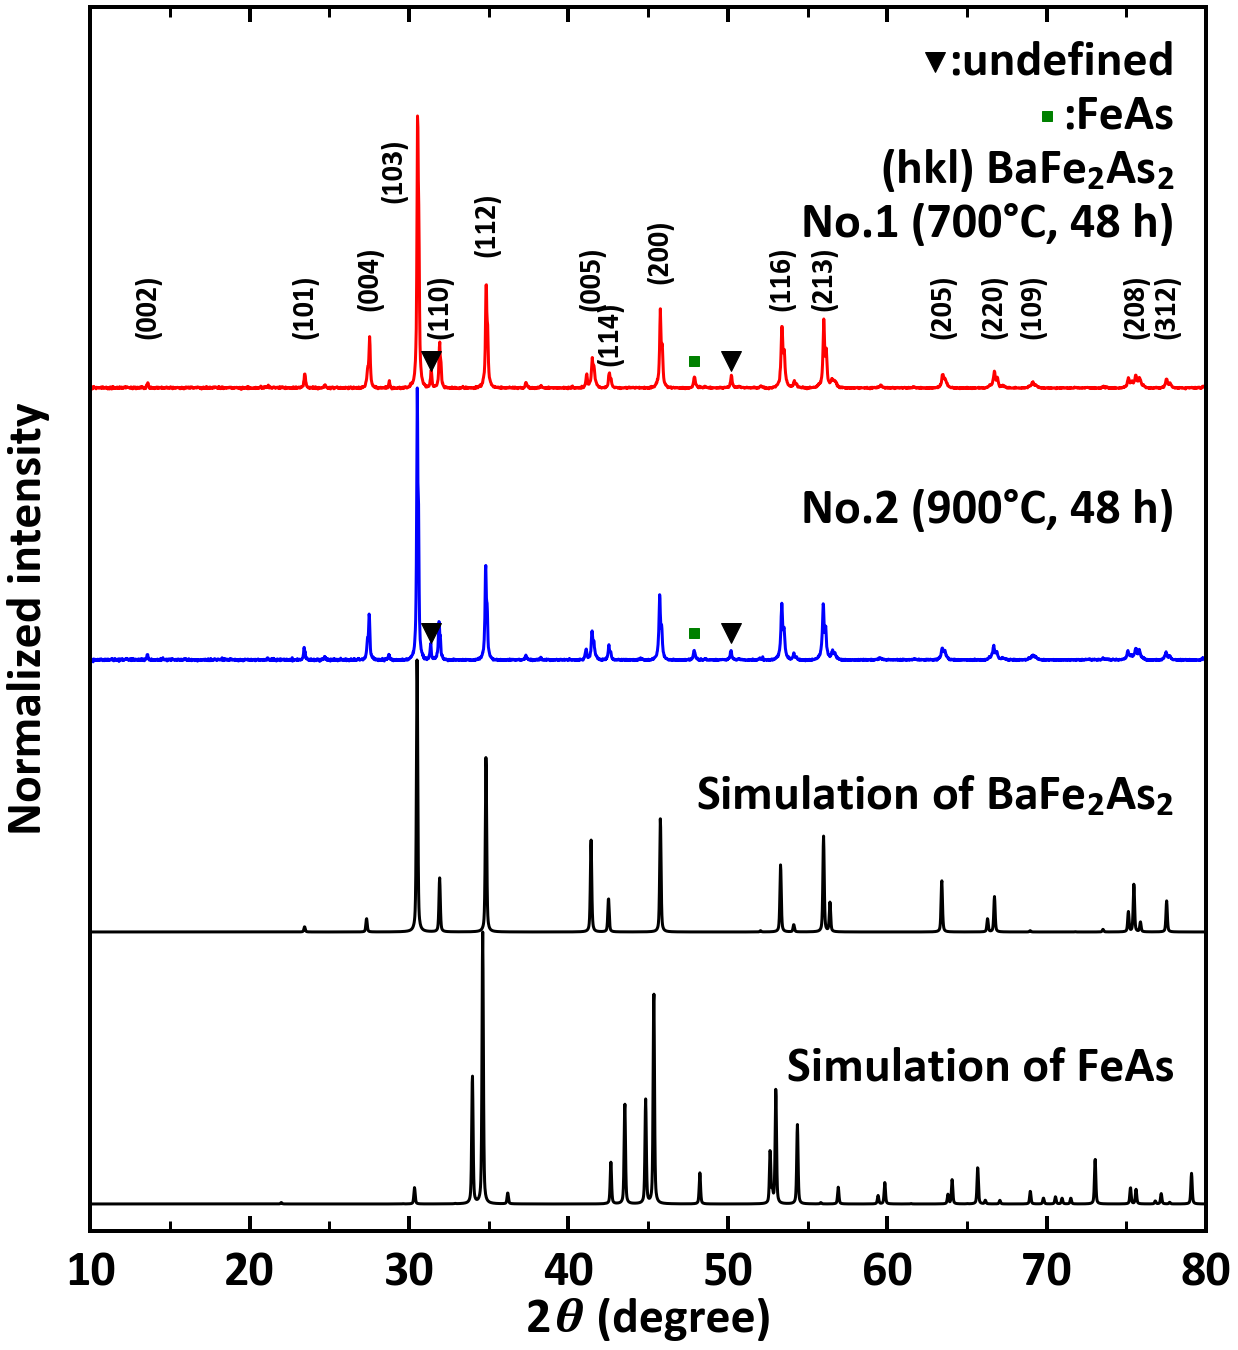

In [43]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')
f_Cambriaz = FontProperties(fname=r'C:\WINDOWS\Fonts\cambriaz.ttf')

plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 30

def data_name(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    return 'XRD_Result/'+name[len(name)-1]+'.png'


fig = plt.figure(figsize = (20, 25))
fig.patch.set_edgecolor('k')

fig.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(4)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['right'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 4, length = 15, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 3, length = 10)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(10, 80)
ax1.set_xticks(np.arange(10, 80+1, 10))
ax1.set_xticklabels(np.arange(10, 80+1, 10), fontproperties = f_Calibrib, fontsize = 50)
ax1.set_xlabel(xlabel = '2 '+'   (degree)', fontproperties = f_Calibrib, fontsize = 50)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

#y軸の目盛りの設定
ax1.set_ylim(-0.1, 4.4)
ax1.set_yticks([])
ax1.set_yticklabels([], fontproperties = f_Calibri, fontsize = 30)
ax1.set_ylabel(ylabel = 'Normalized intensity', fontproperties = f_Calibrib, fontsize = 50, labelpad = 40)
ax1.text(40, -0.47, 'θ', fontproperties = f_Cambriaz, fontsize = 50, ha = 'center')

#y軸の補助目盛りの設定
#ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0))

#プロット
ax1.plot(df_sumi1['2theta (degree)'], df_sumi1['Intensity'] ,color = 'k', marker = '.', markersize = '0', linewidth = 3, clip_on = False)
ax1.plot(df_sumi['2theta (degree)'], df_sumi['Intensity']+1 ,color = 'k', marker = '.', markersize = '0', linewidth = 3, clip_on = False)
ax1.plot(df2['2theta (degree)'], df2['Intensity']+2 ,color = 'blue', marker = '.', markersize = '0', linewidth = 3, clip_on = False)
ax1.plot(df1['2theta (degree)'], df1['Intensity']+3 ,color = 'red', marker = '.', markersize = '0', linewidth = 3, clip_on = False)

#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
#ax1.legend(['$\mathrm{NidopeBa-122\ 900^{\circ}C\ 48h}$'], prop={'size':20,'fname':r'C:\WINDOWS\Fonts\Calibri.ttf'}, frameon = False,)
ax1.text(78, 0.5, 'Simulation of '+'FeAs', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.5+1, 'Simulation of '+'$\mathregular{BaFe_{2}As_{2}}$', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.55+2, 'No.2 (900°C, 48 h)', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.6+3, 'No.1 (700°C, 48 h)', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.8+3, '(hkl) $\mathregular{BaFe_{2}As_{2}}$', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 1+3, ':FeAs', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.plot(70, 1+3, color = 'g', marker = 's', markersize = '10', linewidth = 0, clip_on = False)
ax1.text(78, 1.2+3, ':undefined', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.plot(63, 1.2+3, color = 'k', marker = 'v', markersize = '20', linewidth = 0, clip_on = False)
ax1.plot([47.896212, 47.896212],[0.1+3,0.1+2], color = 'g', marker = 's', markersize = '10', linewidth = 0, clip_on = False)
ax1.plot([31.373344, 31.373344, 50.215211, 50.215211],[0.1+3,0.1+2, 0.1+3,0.1+2], color = 'k', marker = 'v', markersize = '20', linewidth = 0, clip_on = False)



#hkl
ax1.text(13.611919 , 0.3+3, '(002)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(23.467665 , 0.3+3, '(101)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(27.525914 , 0.4+3, '(004)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(30.530072-1.5 , 0.8+3, '(103)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(31.926741 , 0.3+3, '(110)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(34.851843 , 0.6+3, '(112)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(41.492613 , 0.4+3, '(005)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(42.573055 , 0.2+3, '(114)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(45.761679 , 0.5+3, '(200)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(53.377483 , 0.4+3, '(116)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(56.012709 , 0.4+3, '(213)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(63.496752 , 0.3+3, '(205)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(66.711727 , 0.3+3, '(220)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(69.136136 , 0.3+3, '(109)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(75.592440 , 0.3+3, '(208)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(77.516155 , 0.3+3, '(312)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)



plt.show()

figname = data_name(path)

fig.savefig('XRD_Result/XRD.png', format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

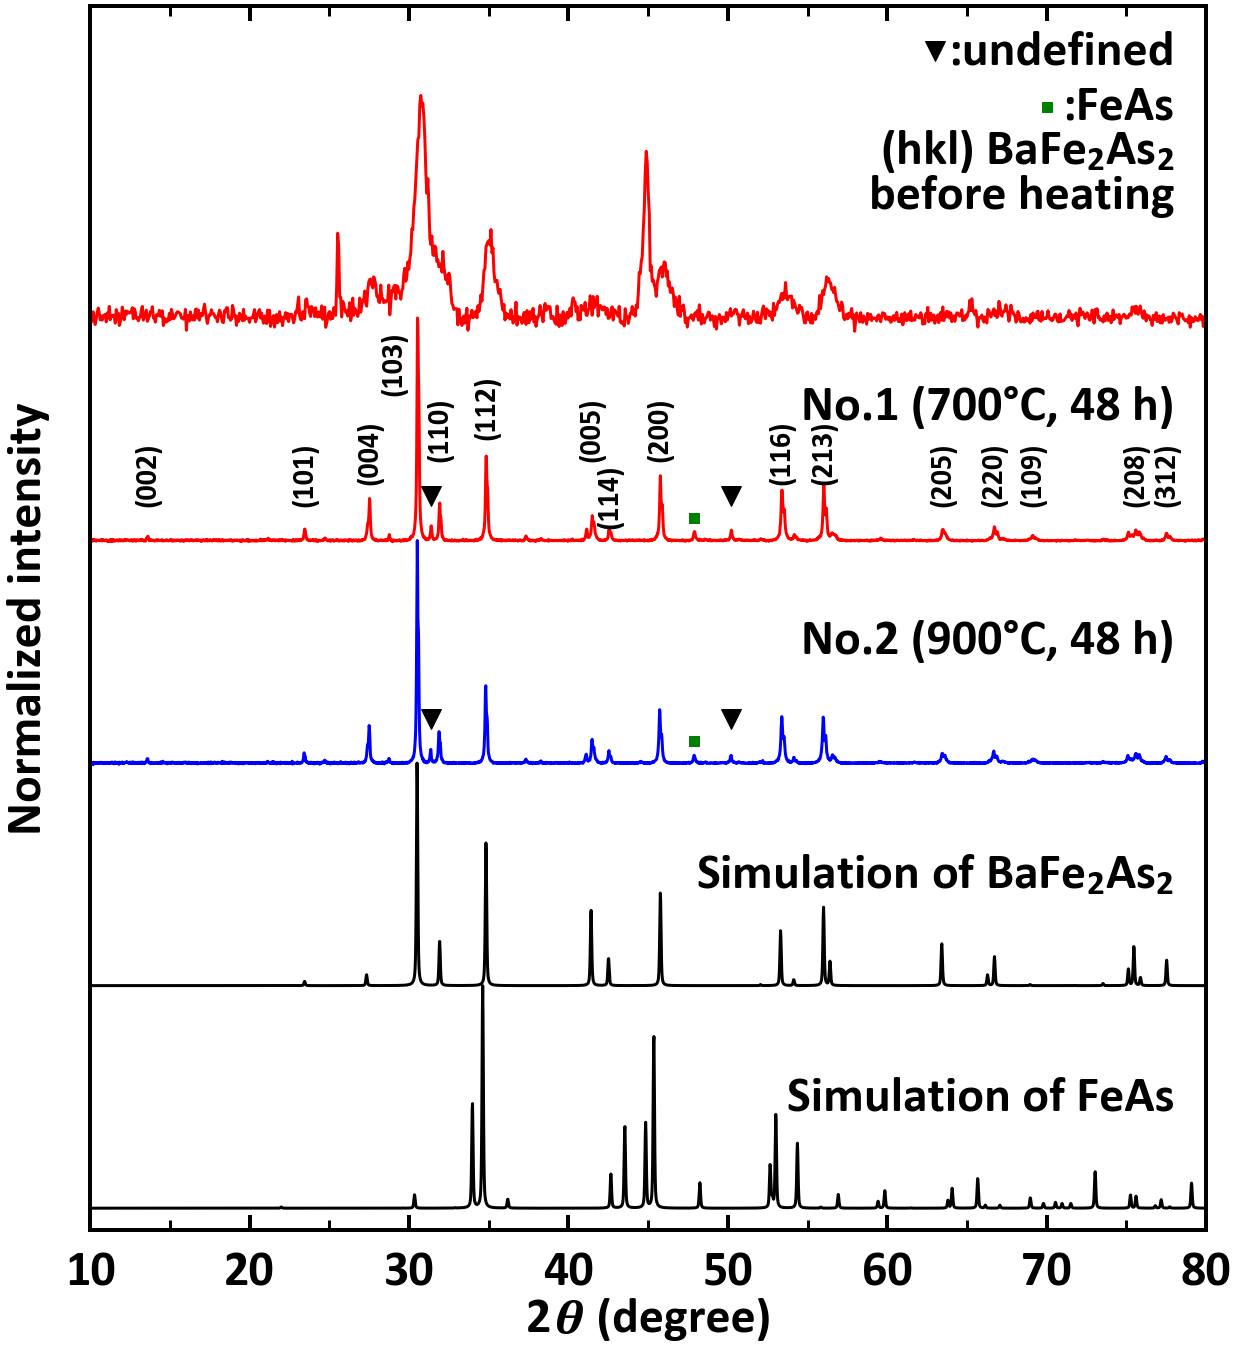

In [56]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')
f_Cambriaz = FontProperties(fname=r'C:\WINDOWS\Fonts\cambriaz.ttf')

plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 30

def data_name(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    return 'XRD_Result/'+name[len(name)-1]+'.png'


fig = plt.figure(figsize = (20, 25))
fig.patch.set_edgecolor('k')

fig.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(4)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['right'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 4, length = 15, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 3, length = 10)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(10, 80)
ax1.set_xticks(np.arange(10, 80+1, 10))
ax1.set_xticklabels(np.arange(10, 80+1, 10), fontproperties = f_Calibrib, fontsize = 50)
ax1.set_xlabel(xlabel = '2 '+'   (degree)', fontproperties = f_Calibrib, fontsize = 50)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

#y軸の目盛りの設定
ax1.set_ylim(-0.1, 5.4)
ax1.set_yticks([])
ax1.set_yticklabels([], fontproperties = f_Calibri, fontsize = 30)
ax1.set_ylabel(ylabel = 'Normalized intensity', fontproperties = f_Calibrib, fontsize = 50, labelpad = 40)

#y軸の補助目盛りの設定
#ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0))

#プロット
ax1.plot(df_sumi1['2theta (degree)'], df_sumi1['Intensity'] ,color = 'k', marker = '.', markersize = '0', linewidth = 3, clip_on = False)
ax1.plot(df_sumi['2theta (degree)'], df_sumi['Intensity']+1 ,color = 'k', marker = '.', markersize = '0', linewidth = 3, clip_on = False)
ax1.plot(df2['2theta (degree)'], df2['Intensity']+2 ,color = 'blue', marker = '.', markersize = '0', linewidth = 3, clip_on = False)
ax1.plot(df1['2theta (degree)'], df1['Intensity']+3 ,color = 'red', marker = '.', markersize = '0', linewidth = 3, clip_on = False)
ax1.plot(df5['2theta (degree)'], df5['Intensity']+4 ,color = 'red', marker = '.', markersize = '0', linewidth = 3, clip_on = False)

#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
#ax1.legend(['$\mathrm{NidopeBa-122\ 900^{\circ}C\ 48h}$'], prop={'size':20,'fname':r'C:\WINDOWS\Fonts\Calibri.ttf'}, frameon = False,)
ax1.text(78, 0.5, 'Simulation of '+'FeAs', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.5+1, 'Simulation of '+'$\mathregular{BaFe_{2}As_{2}}$', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.55+2, 'No.2 (900°C, 48 h)', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.6+3, 'No.1 (700°C, 48 h)', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.75+4, '(hkl) $\mathregular{BaFe_{2}As_{2}}$', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.55+4, 'before heating', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.text(78, 0.95+4, ':FeAs', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.plot(70, 0.95+4, color = 'g', marker = 's', markersize = '10', linewidth = 0, clip_on = False)
ax1.plot([47.896212, 47.896212],[0.1+3,0.1+2], color = 'g', marker = 's', markersize = '10', linewidth = 0, clip_on = False)
ax1.text(78, 1.2+4, ':undefined', fontproperties = f_Calibrib, fontsize = 50, ha = 'right', va = 'center')
ax1.plot(63, 1.2+4, color = 'k', marker = 'v', markersize = '20', linewidth = 0, clip_on = False)
ax1.plot([47.896212, 47.896212],[0.1+3,0.1+2], color = 'g', marker = 's', markersize = '10', linewidth = 0, clip_on = False)
ax1.plot([31.373344, 31.373344, 50.215211, 50.215211],[0.2+3,0.2+2, 0.2+3,0.2+2], color = 'k', marker = 'v', markersize = '20', linewidth = 0, clip_on = False)




ax1.text(40, -0.56, 'θ', fontproperties = f_Cambriaz, fontsize = 50, ha = 'center')

#hkl
ax1.text(13.611919 , 0.3+3, '(002)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(23.467665 , 0.3+3, '(101)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(27.525914 , 0.4+3, '(004)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(30.530072-1.5 , 0.8+3, '(103)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(31.926741 , 0.5+3, '(110)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(34.851843 , 0.6+3, '(112)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(41.492613 , 0.5+3, '(005)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(42.573055 , 0.2+3, '(114)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(45.761679 , 0.5+3, '(200)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(53.377483 , 0.4+3, '(116)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(56.012709 , 0.4+3, '(213)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(63.496752 , 0.3+3, '(205)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(66.711727 , 0.3+3, '(220)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(69.136136 , 0.3+3, '(109)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(75.592440 , 0.3+3, '(208)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)
ax1.text(77.516155 , 0.3+3, '(312)', fontproperties = f_Calibrib, fontsize = 30, ha = 'center', va = 'center',rotation = 90)



plt.show()

figname = data_name(path)

fig.savefig('XRD_Result/XRD_2.png', format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')